In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

import scipy as sp
import scipy.stats

from math import factorial
from scipy.spatial import distance

from optimizers import *
from exp_family import *
from projectors import *

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [3]:
def _dot(a, b):
    return sum(np.inner(x.ravel(), y.ravel()) for x, y in zip(a, b))


## Бублик

In [4]:
#obj = lambda x: sp.stats.multivariate_normal.pdf(x, mean=[0, 0], cov=np.diag([1, 1]))
obj = lambda x: _dot(x, x) <= 4

In [5]:
projector = CoordProjector(BoxProjector(-1, 1), EigenBoxProjector(1, 15))
thetas, estimations = projected_gradient(obj, GaussianDistribution, projector, 
                                         1e-6, (np.array([0, 0]), np.eye(2)), n_iters=10 ** 5)

In [6]:
projector_m = CoordProjector(BoxProjector(-1, 1), EigenBoxProjector(1, 15))
thetas_m, estimations_m = mirror_update(obj, GaussianDistribution, mirror, 
                                         1e-6, theta0 = (np.array([0, 0]), np.eye(2)), n_iters=10 ** 5)

In [7]:
thetas_ad, estimations_ad = admm(obj, GaussianDistribution, projector, 1, 1e-6, 
                           (np.array([0, 0]), np.eye(2)), n_iters=10 ** 5)

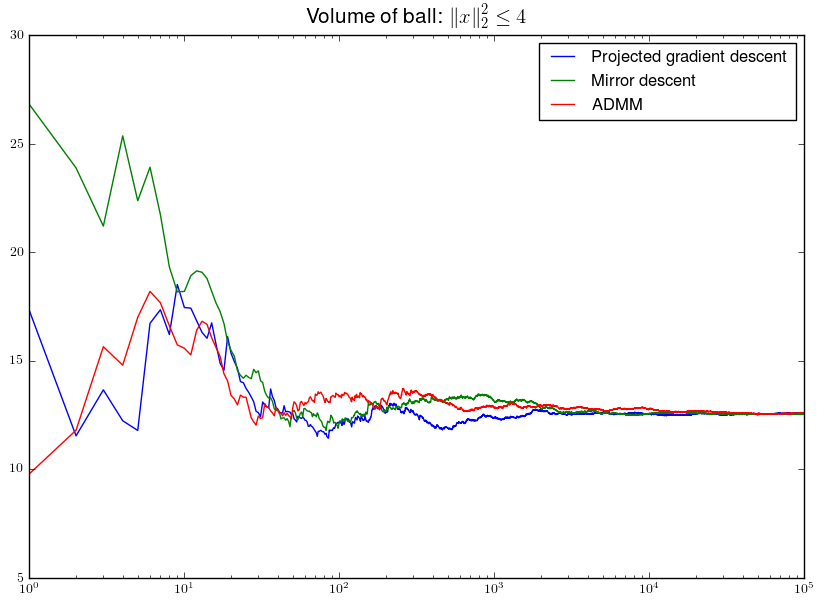

In [8]:
plt.figure(figsize=(10, 7))
plt.title(r" Volume of ball: $\displaystyle \| x \|^2_2 \le 4$",
          fontsize=15)
plt.plot(np.array(estimations), label = "Projected gradient descent")
plt.plot(np.array(estimations_m), label = "Mirror descent")
plt.plot(np.array(estimations_ad), label = "ADMM")
plt.xscale('log')
plt.legend(loc = 'best')

plt.savefig('ball.png')

In [9]:
estimations[-1] # true: 4pi

12.590500083571106

Довольно хорошо сходится.

## Эллипс

In [10]:
np.random.seed(42)
A = np.random.randn(2, 2) + 0.2 * np.eye(2)
obj = lambda x: np.inner(x, np.dot(A, x)) <= 4

In [11]:
projector = CoordProjector(BoxProjector(-1, 1), EigenBoxProjector(1, 15))
thetas, estimations = projected_gradient(obj, GaussianDistribution, projector, 
                                         1e-6, (np.array([0, 0]), np.eye(2)), n_iters=10 ** 5)

In [12]:
projector = CoordProjector(BoxProjector(-1, 1), EigenBoxProjector(1, 15))
thetas_m, estimations_m = mirror_update(obj, GaussianDistribution, mirror, 
                                         1e-6, theta0 = (np.array([0, 0]), np.eye(2)), n_iters=10 ** 5)

In [13]:
thetas_ad, estimations_ad = admm(obj, GaussianDistribution, projector, 1, 1e-6, 
                           (np.array([0, 0]), np.eye(2)), n_iters=10 ** 5)

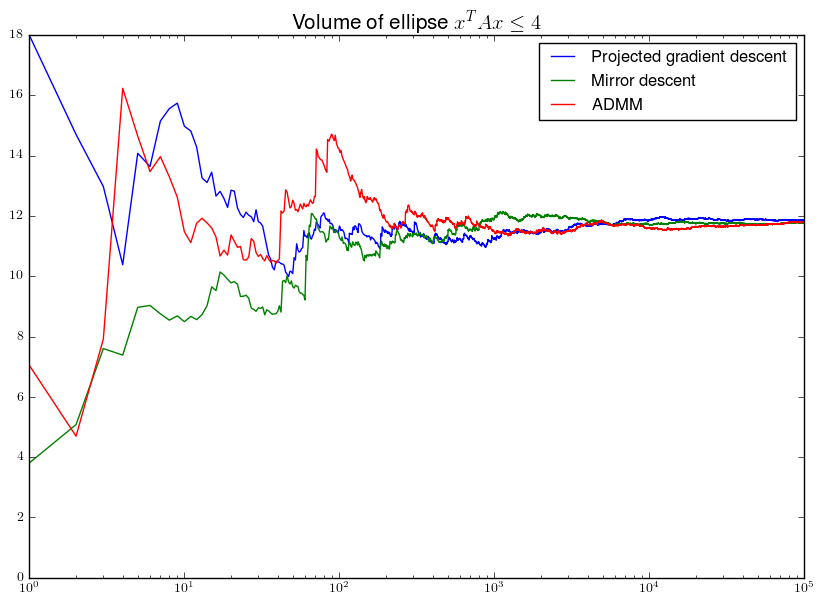

In [14]:
plt.figure(figsize=(10, 7))
plt.title(r" Volume of ellipse $\displaystyle x^TAx \le 4$",
          fontsize=15)
plt.plot(np.array(estimations), label = "Projected gradient descent")
plt.plot(np.array(estimations_m), label = "Mirror descent")
plt.plot(np.array(estimations_ad), label = "ADMM")
plt.xscale('log')
plt.legend(loc = 'best')

plt.savefig('ellipse2.png')

## Polytope volume.

In [15]:
n, lamb = 3, 10
np.random.seed(42)
A = np.random.rand(n, n) + lamb * np.eye(n)
b = np.random.rand(n) + lamb
obj = lambda x: np.logical_and(np.dot(A, x) <= b, x >= np.zeros(len(x))).sum() == len(x)

In [16]:
projector = CoordProjector(BoxProjector(0, 1))
thetas, estimations = projected_gradient(obj, DirichletDistribution, projector, 
                                         1e-7, theta0 = (np.ones(n) * 1./ (n), ), n_iters=10 ** 5)

In [18]:
projector_m = CoordProjector(BoxProjector(0, 1))
thetas_m, estimations_m = mirror_update(obj, DirichletDistribution, mirror, 
                                         1e-7, theta0 = (np.ones(n) * 1./ n, ), n_iters=10 ** 5)

In [19]:
thetas_ad, estimations_ad = admm(obj, DirichletDistribution, projector, 1, 1e-7, 
                           theta0 = (np.ones(n) * 1./ (n), ), n_iters=10 ** 5)

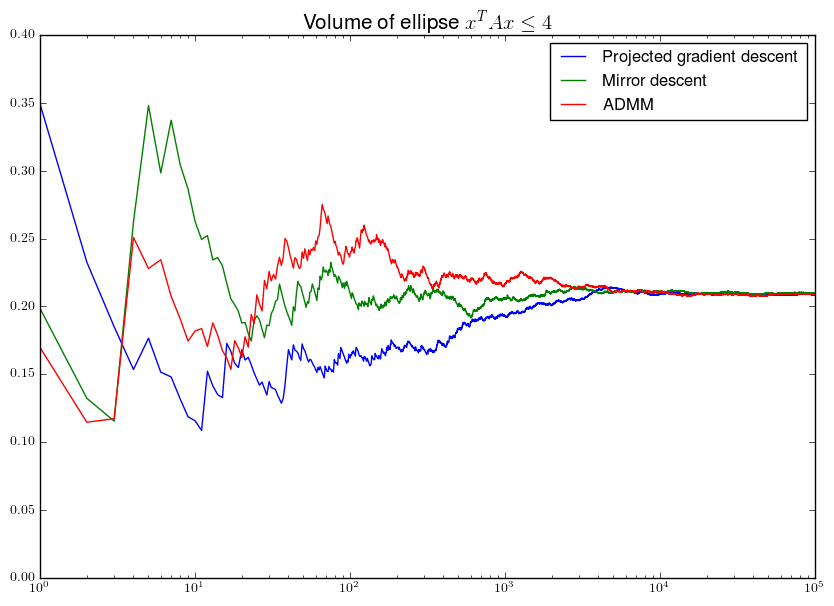

In [20]:
plt.figure(figsize=(10, 7))
plt.title(r" Volume of ellipse $\displaystyle x^TAx \le 4$",
          fontsize=15)
plt.plot(np.array(estimations), label = "Projected gradient descent")
plt.plot(np.array(estimations_m), label = "Mirror descent")
plt.plot(np.array(estimations_ad), label = "ADMM")
plt.xscale('log')
plt.legend(loc = 'best')